## Analyzing Subway and Weather Data

## Two Dimensional Data

1. Python: List of lists
2. NumPy: 2D array
3. Pandas: DataFrame

2D arrays, as opposed to array of arrays:
- [more memory efficient](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html#internal-memory-layout-of-an-ndarray);
- accessing elements is a bit different: `a[1,3]` rather than `a[1][3]`
- mean(), std(), etc operate on entire array;

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

# Accessing elements
print(ridership[1, 3])
print(ridership[1:3, 3:5])
print(ridership[1, :])

2328
[[2328 2539]
 [6461 2691]]
[1478 3877 3674 2328 2539]


In [3]:
# Vectorized operations on rows or columns
print(ridership[0, :] + ridership[1, :])
print(ridership[:, 0] + ridership[:, 1])

[1478 3877 3676 2333 2539]
[   0 5355 5701 4952 6410 5509  324    2 5223 5385]


In [4]:
# Vectorized operations on entire arrays
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
print(a + b)

[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]


In [5]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    overall_mean = ridership.mean() # Replace this with your code
    mean_for_max = ridership[:, ridership[0, :].argmax()].mean() # Replace this with your code
    
    return (overall_mean, mean_for_max)

In [6]:
ridership.argmax()

13

In [7]:
ridership.mean()

2342.6

In [8]:
ridership[0, :]

array([0, 0, 2, 5, 0])

In [9]:
# Find the station with the maximum riders on the first day
max_station = ridership[0, :].argmax()
print(max_station)

# mean riders per day for that station
mean_for_max = ridership[:, max_station].mean()
print(mean_for_max)

# overall mean
overall_mean = ridership.mean()
print(overall_mean)

3
3239.9
2342.6


In [10]:
mean_riders_for_max_station(ridership)

(2342.6, 3239.9)

## NumPy Axis

- if you want to calculate the mean for each row, or column: `ridership.mean(axis=0)`
- it can be either 0 or 1
- `axis=0`: function calculated for each column;
- `axis=1`: function calculated for each row; 

In [11]:
# NumPy axis argument
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

print(a.sum())
print(a.sum(axis=0))
print(a.sum(axis=1))

45
[12 15 18]
[ 6 15 24]


In [1]:
def min_and_max_riders_per_day(ridership):
    '''
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    '''
    # max
    max_daily_ridership = ridership.mean(axis=0).max()

    # min
    min_daily_ridership = ridership.mean(axis=0).min()
    
    return (max_daily_ridership, min_daily_ridership)

In [13]:
# for each subway station, calculate the mean ridership per day
station_riders = ridership.mean(axis=0)

# max
max_daily_ridership = ridership.mean(axis=0).max()

# min
min_daily_ridership = ridership.mean(axis=0).min()

In [14]:
min_and_max_riders_per_day(ridership)

(3239.9, 1071.2)

## NumPy and Pandas Data Types

- datafranes have indexes similar to Pandas series
- there is an index value for each row
- a name for column
- mean of each column not entire dataframe
- can use the `axis` argument to take the mean of each row

In [15]:
np.array([1,2,3,4,5]).dtype

dtype('int32')

In [16]:
# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

In [17]:
ridership_df

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


In [18]:
ridership_df.loc['05-02-11']

R003    1478
R004    3877
R005    3674
R006    2328
R007    2539
Name: 05-02-11, dtype: int64

In [19]:
# access row by position
ridership_df.iloc[9]

R003    1342
R004    4043
R005    4009
R006    4665
R007    3033
Name: 05-10-11, dtype: int64

In [20]:
# accessing a single element indicating both a row and a column
ridership_df.iloc[0, 3]

5

In [21]:
ridership_df['R006']

05-01-11       5
05-02-11    2328
05-03-11    6461
05-04-11    4787
05-05-11    4477
05-06-11    4979
05-07-11     496
05-08-11      27
05-09-11    4174
05-10-11    4665
Name: R006, dtype: int64

In [22]:
# get the values 
ridership_df.values

array([[   0,    0,    2,    5,    0],
       [1478, 3877, 3674, 2328, 2539],
       [1613, 4088, 3991, 6461, 2691],
       [1560, 3392, 3826, 4787, 2613],
       [1608, 4802, 3932, 4477, 2705],
       [1576, 3933, 3909, 4979, 2685],
       [  95,  229,  255,  496,  201],
       [   2,    0,    1,   27,    0],
       [1438, 3785, 3589, 4174, 2215],
       [1342, 4043, 4009, 4665, 3033]], dtype=int64)

In [23]:
# take the mean of all the values
ridership_df.values.mean()

2342.6

In [24]:
# DataFrame creation
# You can create a DataFrame out of a dictionary mapping column names to values
df_1 = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
print(df_1)

# You can also use a list of lists or a 2D NumPy array
df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])
print(df_2)

   A  B
0  0  3
1  1  4
2  2  5
   A  B  C
0  0  1  2
1  3  4  5


In [25]:
# Accessing elements
print(ridership_df.iloc[0])
print('------')
print(ridership_df.loc['05-05-11'])
print('------')
print(ridership_df['R003'])
print('------')
print(ridership_df.iloc[1, 3])

R003    0
R004    0
R005    2
R006    5
R007    0
Name: 05-01-11, dtype: int64
------
R003    1608
R004    4802
R005    3932
R006    4477
R007    2705
Name: 05-05-11, dtype: int64
------
05-01-11       0
05-02-11    1478
05-03-11    1613
05-04-11    1560
05-05-11    1608
05-06-11    1576
05-07-11      95
05-08-11       2
05-09-11    1438
05-10-11    1342
Name: R003, dtype: int64
------
2328


In [26]:
# Accessing multiple rows
print(ridership_df.iloc[1:4])

          R003  R004  R005  R006  R007
05-02-11  1478  3877  3674  2328  2539
05-03-11  1613  4088  3991  6461  2691
05-04-11  1560  3392  3826  4787  2613


In [27]:
# Accessing multiple columns
print(ridership_df[['R003', 'R005']])

          R003  R005
05-01-11     0     2
05-02-11  1478  3674
05-03-11  1613  3991
05-04-11  1560  3826
05-05-11  1608  3932
05-06-11  1576  3909
05-07-11    95   255
05-08-11     2     1
05-09-11  1438  3589
05-10-11  1342  4009


In [28]:
# Pandas axis
df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
print(df.sum())
print(df.sum(axis=1))
print(df.values.sum())

A     3
B    12
dtype: int64
0    3
1    5
2    7
dtype: int64
15


In [29]:
# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)
ridership_df

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


In [30]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    overall_mean = ridership.values.mean() 
    mean_for_max = ridership.mean(axis=0).max() 
    
    return (overall_mean, mean_for_max)

In [31]:
ridership_df.values.mean()

2342.6

In [32]:
ridership_df.mean(axis=0).max()

3239.9

In [33]:
mean_riders_for_max_station(ridership_df)

(2342.6, 3239.9)

## Loading Data into a Dataframe

In [37]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,0.004618,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,0.025832,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,0.000000,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,0.000000,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,0.000000,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,0.000000,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,0.300000,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


## Calculating Correlation (Pearson's r)

**Pearson's r `[-1, 1]`**:
- standardize each variable = converting both vars to a similar scale;
- multiply each pair of values and take the average
- if both values are above the mean => their product is `+`
- if both values are below the mean => their product is `+`
- if `r = +` => as one variable increases, the other tends to increase as well
- if one value is below the mean and the other is above => their product = `-`
- if `r = -` => as one variable increases, the other tends to decrease
- if `r = 0` => not strongly correlated 

- `r = average of (x in std units) * (y in std units)`
- use `var std(ddof=0)` (uncorrected std)

### Understand and Interpreting Correlations

- [This page](http://onlinestatbook.com/2/describing_bivariate_data/pearson.html) contains some scatterplots of variables with different values of correlation.
- [This page](http://rpsychologist.com/d3/correlation/) lets you use a slider to change the correlation and see how the data might look.
- Pearson's r only measures linear correlation! [This image](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg) shows some different linear and non-linear relationships and what Pearson's r will be for those relationships.

### Corrected vs. Uncorrected Standard Deviation
By default, Pandas' `std()` function computes the standard deviation using [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). Calling `std(ddof=0)` ensures that Bessel's correction will not be used.

### Pearson's r in NumPy
NumPy's [corrcoef() function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) can be used to calculate Pearson's r, also known as the correlation coefficient.

In [36]:
pd.set_option('display.max_columns', 5400)
subway_df = pd.read_csv('nyc_subway_weather.csv')
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,weekday,station,latitude,longitude,conds,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,0,CYPRESS HILLS,40.689945,-73.872564,Clear,0,0.0,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,0,CYPRESS HILLS,40.689945,-73.872564,Partly Cloudy,0,0.0,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [48]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    # standardize data
    x_standardized_values = (x - x.mean()) / x.std(ddof=0)
    y_standardized_values = (y - y.mean()) / y.std(ddof=0)
    
    # correlation
    correlation = (x_standardized_values * y_standardized_values).mean()
    
    return correlation

In [38]:
entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

In [50]:
print(correlation(entries, rain))
print(correlation(entries, temp))
print(correlation(rain, temp))
print(correlation(entries, cum_entries))

0.03564851577224405
-0.026693348321570803
-0.22903432340843488
0.5858954707662075


## Pandas Axis Names

- `axis=0 <=> axis='index'` = along the index;
- `axis=1 <=> axis='columns'` = row;

## Data Frame Vectorized Operations

- they match up elements by index and column name rather than position

### Pandas shift()
Documentation for the Pandas `shift()` function is [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html). If you're still not sure how the function works, try it out and see!

### Alternative Solution
As an alternative to using vectorized operations, you could also use the code `return entries_and_exits.diff()` to calculate the answer in a single step.

In [51]:
# Adding DataFrames with the column names
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
print(df1 + df2)

    a   b   c
0  11  44  77
1  22  55  88
2  33  66  99


In [52]:
# Adding DataFrames with overlapping column names 
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
print(df1 + df2)

    a   b   c   d
0 NaN  74  47 NaN
1 NaN  85  58 NaN
2 NaN  96  69 NaN


In [53]:
# Adding DataFrames with overlapping row indexes
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                   index=['row1', 'row2', 'row3'])
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                   index=['row4', 'row3', 'row2'])
print(df1 + df2)

         a     b     c
row1   NaN   NaN   NaN
row2  32.0  65.0  98.0
row3  23.0  56.0  89.0
row4   NaN   NaN   NaN


In [61]:
# --- Quiz ---
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})
entries_and_exits

,ENTRIESn,EXITSn
0,3144312,1088151
1,3144335,1088159
2,3144353,1088177
3,3144424,1088231
4,3144594,1088275
5,3144808,1088317
6,3144895,1088328
7,3144905,1088331
8,3144941,1088420
9,3145094,1088753


In [71]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits.diff().fillna(value=0)

In [72]:
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,0.0,0.0
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


In [74]:
entries_and_exits - entries_and_exits.shift(1)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


## Non Built-in Functions for DataFrames

- `df.applymap(clean_state)`

The grader will execute your finished `convert_grades(grades)` function on some test `grades` DataFrames when you submit your answer. Make sure that this function returns a DataFrame with the converted grades. 

**Hint**: You may need to define a helper function to use with `.applymap()`.

In [76]:
# DataFrame applymap()
df = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [10, 20, 30],
    'c': [5, 10, 15]
})

def add_one(x):
    return x + 1

print(df.applymap(add_one))

   a   b   c
0  2  11   6
1  3  21  11
2  4  31  16


In [77]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [97]:
def convert_grade(grade):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    if (grade >= 90):
        letter_grade = 'A'
    elif (grade>=80):
        letter_grade = 'B'
    elif (grade>=70):
        letter_grade = 'C'
    elif (grade>=60):
        letter_grade = 'D'
    else:
        letter_grade = 'F'
    
    return letter_grade

In [98]:
def convert_grades(grades):
    return grades.applymap(convert_grade)

In [99]:
convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


## Data Frame apply()

- takes in an entire column of the data frame and it returns a new pandas series
- `apply()` calls your function on each column of the data frame
- takes an access argument => can write a function that operates on one row at a time

**Note:** In order to get the proper computations, we should actually be setting the value of the "ddof" parameter to 0 in the ``.std()`` function.

Note that the type of standard deviation calculated by default is different between numpy's `.std()` and pandas' `.std()` functions. By default, numpy calculates a population standard deviation, with "ddof = 0". On the other hand, pandas calculates a sample standard deviation, with "ddof = 1". If we know all of the scores, then we have a population - so to standardize using pandas, we need to set "ddof = 0".

In [100]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [102]:
# DataFrame apply()
def convert_grades_curve(exam_grades):
    # Pandas has a bult-in function that will perform this calculation
    # This will give the bottom 0% to 10% of students the grade 'F',
    # 10% to 20% the grade 'D', and so on. You can read more about
    # the qcut() function here:
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    return pd.qcut(exam_grades,
                   [0, 0.1, 0.2, 0.5, 0.8, 1],
                   labels=['F', 'D', 'C', 'B', 'A'])

# qcut() operates on a list, array, or Series. This is the
# result of running the function on a single column of the
# DataFrame.
print(convert_grades_curve(grades_df['exam1']))

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]


def standardize_column(column):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''  
    return (column - column.mean()) / column.std(ddof=0)

In [114]:
standardize_column(grades_df.exam1)

Andre     -2.315341
Barry      0.220191
Chris      0.020017
Dan       -0.180156
Emilio     0.753987
Fred      -0.513779
Greta      0.887436
Humbert   -0.847401
Ivan       1.354508
James      0.620538
Name: exam1, dtype: float64

In [111]:
def standardize(df):
    return df.apply(standardize_column)

In [113]:
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


## Data Frame apply() Use Case 2

- the function can take one column and return a single value
- `apply()` will create a new series
- the second largest value in each column

In [116]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})
print(df)
print(df.apply(np.mean))
print(df.apply(np.max))

   a   b   c
0  4  20  25
1  5  10  20
2  3  40   5
3  1  50  15
4  2  30  10
a     3.0
b    30.0
c    15.0
dtype: float64
a     5
b    50
c    25
dtype: int64


In [122]:
def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    return df[df < df.max()].max() 

In [121]:
df.a
df.a[df.a < df.a.max()].max() 

4

In [123]:
df.apply(second_largest)

a     4
b    40
c    20
dtype: int64

In [125]:
def second_largest_in_column(column):
    sorted_column = column.sort_values(ascending=False)
    return sorted_column.iloc[1]

In [126]:
second_largest_in_column(df.a)

4

In [129]:
def second_largest(df):
    return df.apply(second_largest_in_column)
second_largest(df)

a     4
b    40
c    20
dtype: int64

## Adding a Data Frame to a Series

In [130]:
# Adding a Series to a square DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print(df)
print('-------') 
print(df + s)

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160
-------
    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [131]:
# Adding a Series to a one-row DataFrame 
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})

print(df)
print('-------') 
print(df + s)

    0   1   2   3
0  10  20  30  40
-------
    0   1   2   3
0  11  22  33  44


In [132]:
# Adding a Series to a one-column DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})
    
print(df)
print('-------') 
print(df + s)

    0
0  10
1  20
2  30
3  40
-------
    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


In [133]:
# Adding when DataFrame column names match Series index
s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

print(df)
print('-------') 
print(df + s)

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160
-------
    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [134]:
# Adding when DataFrame column names don't match Series index
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

print(df)
print('-------') 
print(df + s)

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160
-------
    a   b   c   d   0   1   2   3
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


In [136]:
# Adding with axis='index'
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})
    
print(df)
print('-------') 
print(df.add(s, axis='index'))

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160
-------
    0   1    2    3
0  11  51   91  131
1  22  62  102  142
2  33  73  113  153
3  44  84  124  164


In [180]:
# Adding with axis='columns'
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print(s)
print(df)
print('-------') 
print(df.add(s, axis='columns'))

0    1
1    2
2    3
3    4
dtype: int64
    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160
-------
    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [139]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [140]:
(grades_df.exam1 - grades_df.exam1.mean())/grades_df.exam1.std(ddof=0)

Andre     -2.315341
Barry      0.220191
Chris      0.020017
Dan       -0.180156
Emilio     0.753987
Fred      -0.513779
Greta      0.887436
Humbert   -0.847401
Ivan       1.354508
James      0.620538
Name: exam1, dtype: float64

In [144]:
grades_df.mean(axis='index')

exam1    77.7
exam2    57.4
dtype: float64

In [147]:
(grades_df - grades_df.mean(axis='index')) / grades_df.std(ddof=0, axis='index')

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [193]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    return (df - df.mean(axis='index')) / df.std(ddof=0, axis='index')

def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    mean_diffs = grades_df.sub(grades_df.mean(axis='columns'), axis='index')
    
    return mean_diffs.div(grades_df.std(axis='columns', ddof=0), axis='index') 

In [149]:
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [195]:
standardize_rows(grades_df)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


In [182]:
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [183]:
grades_df.mean(axis='columns')

Andre      33.5
Barry      72.0
Chris      67.0
Dan        65.5
Emilio     78.0
Fred       60.5
Greta      85.0
Humbert    55.5
Ivan       85.0
James      73.5
dtype: float64

In [188]:
mean_diffs = grades_df.sub(grades_df.mean(axis='columns'), axis='index')

In [189]:
grades_df.std(axis='columns', ddof=0)

Andre       9.5
Barry       9.0
Chris      11.0
Dan         9.5
Emilio     11.0
Fred        9.5
Greta       6.0
Humbert     9.5
Ivan       13.0
James      13.5
dtype: float64

In [192]:
mean_diffs.div(grades_df.std(axis='columns', ddof=0), axis='index') 

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


## Pandas groupby()

- DataFrameGroupBy object = a dictionary mapping each account key to a smaller data frame containing only the rows that match that account key

In [197]:
engagement_df =pd.DataFrame({
    'account_key': [ '1200', '1200', '1200', '1200', '1200', 
                    '1200', '1200', '1175', '1175', '1175',
                     '1175', '1175', '1175', '1175'],
    'utc_date': ['2015-03-04', '2015-03-05', '2015-03-06', '2015-03-07', 
                 '2015-03-08', '2015-03-09', '2015-03-10', '2015-04-02',  
                 '2015-04-03', '2015-04-04', '2015-04-05', '2015-04-06', 
                 '2015-04-07', '2015-04-08'],   
    'total_minutes_visited': [114.9, 43.4, 187.8, 151.1, 191.6, 0, 8.8,
                             2.7, 0, 0, 0, 0, 0, 0]
    })
engagement_df

,account_key,utc_date,total_minutes_visited
0,1200,2015-03-04,114.9
1,1200,2015-03-05,43.4
2,1200,2015-03-06,187.8
3,1200,2015-03-07,151.1
4,1200,2015-03-08,191.6
5,1200,2015-03-09,0.0
6,1200,2015-03-10,8.8
7,1175,2015-04-02,2.7
8,1175,2015-04-03,0.0
9,1175,2015-04-04,0.0


In [202]:
engagement_df.groupby('account_key').sum()

,total_minutes_visited
account_key,
1175,2.7
1200,697.6


In [199]:
engagement_df.groupby('account_key').sum()['total_minutes_visited'].mean()

350.15000000000003

In [203]:
engagement_df.groupby('account_key').sum()['total_minutes_visited'].describe()

count      2.000000
mean     350.150000
std      491.368502
min        2.700000
25%      176.425000
50%      350.150000
75%      523.875000
max      697.600000
Name: total_minutes_visited, dtype: float64

In [200]:
engagement_df.groupby('account_key')

In [201]:
# look at the mapping
engagement_df.groupby('account_key').groups

{'1175': Int64Index([7, 8, 9, 10, 11, 12, 13], dtype='int64'),
 '1200': Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')}

In [204]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

example_df

,value,even,above_three
a,1,False,False
b,3,False,False
c,2,True,False
d,4,True,True
e,1,False,False
f,6,True,True
g,4,True,True


In [205]:
# Examine groups
grouped_data = example_df.groupby('even')
# The groups attribute is a dictionary mapping keys to lists of row indexes
print(grouped_data.groups)

{False: Index(['a', 'b', 'e'], dtype='object'), True: Index(['c', 'd', 'f', 'g'], dtype='object')}


In [206]:
# Group by multiple columns
grouped_data = example_df.groupby(['even', 'above_three'])
print(grouped_data.groups)

{(False, False): Index(['a', 'b', 'e'], dtype='object'), (True, False): Index(['c'], dtype='object'), (True, True): Index(['d', 'f', 'g'], dtype='object')}


In [207]:
# Get sum of each group
grouped_data = example_df.groupby('even')
print(grouped_data.sum())

       value  above_three
even                     
False      5          0.0
True      16          3.0


In [208]:
# Limit columns in result
grouped_data = example_df.groupby('even')

# You can take one or more columns from the result DataFrame
print(grouped_data.sum()['value'])

print('\n') # Blank line to separate results

# You can also take a subset of columns from the grouped data before 
# collapsing to a DataFrame. In this case, the result is the same.
print(grouped_data['value'].sum())

even
False     5
True     16
Name: value, dtype: int32


even
False     5
True     16
Name: value, dtype: int32


In [209]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,weekday,station,latitude,longitude,conds,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,0,CYPRESS HILLS,40.689945,-73.872564,Clear,0,0.0,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,0,CYPRESS HILLS,40.689945,-73.872564,Partly Cloudy,0,0.0,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


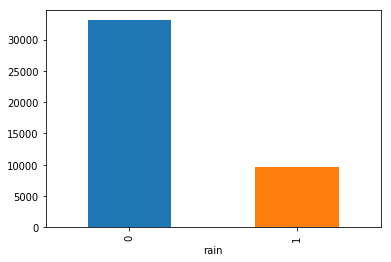

In [215]:
subway_df.groupby('rain').count().UNIT.plot(kind='bar');

In [219]:
ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']
ridership_by_day

day_week
0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64

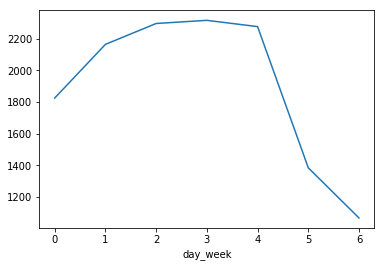

In [224]:
ridership_by_day.plot();

## Using groupby() to Calculate Hourly Entries and Exits

In the quiz where you calculated hourly entries and exits, you did so for a single set of cumulative entries. However, in the original data, there was a separate set of numbers for each station.

Thus, to correctly calculate the hourly entries and exits, it was necessary to group by station and day, then calculate the hourly entries and exits within each day.

Write a function to do that. You should use the `apply()` function to call the function you wrote previously. You should also make sure you restrict your grouped data to just the entries and exits columns, since your function may cause an error if it is called on non-numerical data types.

If you would like to learn more about using` groupby()` in Pandas, [this page](https://pandas.pydata.org/pandas-docs/stable/groupby.html) contains more details.

Note: You will not be able to reproduce the `ENTRIESn_hourly` and `EXITSn_hourly` columns in the full dataset using this method. When creating the dataset, we did extra processing to remove erroneous values.

In [225]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

example_df

,value,even,above_three
a,1,False,False
b,3,False,False
c,2,True,False
d,4,True,True
e,1,False,False
f,6,True,True
g,4,True,True


In [226]:
# Standardize each group
def standardize(xs):
    return (xs - xs.mean()) / xs.std()
grouped_data = example_df.groupby('even')
print(grouped_data['value'].apply(standardize))

a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
Name: value, dtype: float64


In [229]:
# Find second largest value in each group
def second_largest(xs):
    sorted_xs = xs.sort_values(inplace=False, ascending=False)
    return sorted_xs.iloc[1]

grouped_data = example_df.groupby('even')
print(grouped_data['value'].apply(second_largest))

even
False    1
True     4
Name: value, dtype: int64


In [230]:
# --- Quiz ---
# DataFrame with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

ridership_df

,UNIT,TIMEn,ENTRIESn,EXITSn
0,R051,00:00:00,3144312,1088151
1,R079,02:00:00,8936644,13755385
2,R051,04:00:00,3144335,1088159
3,R079,06:00:00,8936658,13755393
4,R051,08:00:00,3144353,1088177
5,R079,10:00:00,8936687,13755598
6,R051,12:00:00,3144424,1088231
7,R079,14:00:00,8936819,13756191
8,R051,16:00:00,3144594,1088275


In [231]:
def hourly_for_group(entries_and_exits):
    return entries_and_exits - entries_and_exits.shift(1)

In [234]:
ridership_df.groupby('UNIT')[['ENTRIESn', 'EXITSn']].apply(hourly_for_group)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


## Working with Multiple DataFrames

- `merge()` combine two tables
- `submissions.merge(enrollments, on='account_key', how='left')`
- how = inner, right, left and outer

In [235]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})
print(subway_df)
print(weather_df)

   UNIT     DATEn  hour  ENTRIESn    EXITSn   latitude  longitude
0  R003  05-01-11     0   4388333   2911002  40.689945 -73.872564
1  R003  05-02-11     0   4388348   2911036  40.689945 -73.872564
2  R003  05-03-11     0   4389885   2912127  40.689945 -73.872564
3  R003  05-04-11     0   4391507   2913223  40.689945 -73.872564
4  R003  05-05-11     0   4393043   2914284  40.689945 -73.872564
5  R004  05-01-11     0  14656120  14451774  40.691320 -73.867135
6  R004  05-02-11     0  14656174  14451851  40.691320 -73.867135
7  R004  05-03-11     0  14660126  14454734  40.691320 -73.867135
8  R004  05-04-11     0  14664247  14457780  40.691320 -73.867135
9  R004  05-05-11     0  14668301  14460818  40.691320 -73.867135
      DATEn  hour   latitude  longitude  pressurei  fog  rain  tempi  wspdi
0  05-01-11     0  40.689945 -73.872564      30.24    0     0   52.0    8.1
1  05-01-11     0  40.691320 -73.867135      30.24    0     0   52.0    8.1
2  05-02-11     0  40.689945 -73.872564      3

In [236]:
subway_df.merge(weather_df, on=['DATEn', 'hour', 'latitude', 'longitude'], how='inner')

,UNIT,DATEn,hour,ENTRIESn,EXITSn,latitude,longitude,pressurei,fog,rain,tempi,wspdi
0,R003,05-01-11,0,4388333,2911002,40.689945,-73.872564,30.24,0,0,52.0,8.1
1,R003,05-02-11,0,4388348,2911036,40.689945,-73.872564,30.32,0,0,48.9,6.9
2,R003,05-03-11,0,4389885,2912127,40.689945,-73.872564,30.14,0,0,54.0,3.5
3,R003,05-04-11,0,4391507,2913223,40.689945,-73.872564,29.98,0,0,57.2,15.0
4,R003,05-05-11,0,4393043,2914284,40.689945,-73.872564,30.01,0,0,48.9,15.0
5,R004,05-01-11,0,14656120,14451774,40.691320,-73.867135,30.24,0,0,52.0,8.1
6,R004,05-02-11,0,14656174,14451851,40.691320,-73.867135,30.32,0,0,48.9,6.9
7,R004,05-03-11,0,14660126,14454734,40.691320,-73.867135,30.14,0,0,54.0,3.5
8,R004,05-04-11,0,14664247,14457780,40.691320,-73.867135,29.98,0,0,57.2,15.0
9,R004,05-05-11,0,14668301,14460818,40.691320,-73.867135,30.01,0,0,48.9,15.0


## If the column names were different

`subway_df.merge(weather_df,
                left_on = ['DATEn', 'hour', 'latitude', 'longitude'],
                right_on= ['date', 'hour', 'latitude', 'longitude'],
                how='inner')`

## Plotting with DataFrames
Just like Pandas Series, DataFrames also have a plot() method. If `df` is a DataFrame, then `df.plot()` will produce a line plot with a different colored line for each variable in the DataFrame. This can be a convenient way to get a quick look at your data, especially for small DataFrames, but for more complicated plots you will usually want to use matplotlib directly.

In the following quiz, create a plot of your choice showing something interesting about the New York subway data. For example, you might create:

- Histograms of subway ridership on both days with rain and days without rain
- A scatterplot of subway stations with latitude and longitude as the x and y axes and ridership as the bubble size
    - If you choose this option, you may wish to use the `as_index=False` argument to `groupby()`. There is example code in the following quiz.
- A scatterplot with subway ridership on one axis and precipitation or temperature on the other
If you're not sure how to make the plot you want, try searching on Google or take a look at the [matplotlib documentation](https://matplotlib.org/api/pyplot_api.html).

In [237]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
example_df

,value,even,above_three
a,1,False,False
b,3,False,False
c,2,True,False
d,4,True,True
e,1,False,False
f,6,True,True
g,4,True,True


In [239]:
# groupby() without as_index
first_even = example_df.groupby('even').first()
print(first_even)
#print(first_even['even'] )# Causes an error. 'even' is no longer a column in the DataFrame

       value  above_three
even                     
False      1        False
True       2        False


In [241]:
# groupby() with as_index=False
first_even = example_df.groupby('even', as_index=False).first()
print(first_even)
print('-------')
print(first_even['even']) # Now 'even' is still a column in the DataFrame

    even  value  above_three
0  False      1        False
1   True      2        False
-------
0    False
1     True
Name: even, dtype: bool


In [242]:
subway_df.head()

,UNIT,DATEn,hour,ENTRIESn,EXITSn,latitude,longitude
0,R003,05-01-11,0,4388333,2911002,40.689945,-73.872564
1,R003,05-02-11,0,4388348,2911036,40.689945,-73.872564
2,R003,05-03-11,0,4389885,2912127,40.689945,-73.872564
3,R003,05-04-11,0,4391507,2913223,40.689945,-73.872564
4,R003,05-05-11,0,4393043,2914284,40.689945,-73.872564


In [243]:
pd.set_option('display.max_columns', 5400)
subway_df = pd.read_csv('nyc_subway_weather.csv')
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,weekday,station,latitude,longitude,conds,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,0,CYPRESS HILLS,40.689945,-73.872564,Clear,0,0.0,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,0,CYPRESS HILLS,40.689945,-73.872564,Partly Cloudy,0,0.0,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [247]:
data_by_location = subway_df.groupby(['latitude', 'longitude'], as_index=False).mean()
data_by_location.head()

,latitude,longitude,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,40.576152,-73.975925,9.659049e+06,8.641132e+06,403.896175,325.956284,10.032787,2.907104,0.715847,0.010929,0.006284,29.972568,0.229508,63.383607,5.553005,0.006284,29.972568,63.383607,5.553005,40.603489,-73.958763
1,40.576298,-73.968523,8.306897e+06,6.646823e+06,526.697297,419.562162,9.989189,2.951351,0.708108,0.010811,0.006216,29.973297,0.227027,63.375135,5.517838,0.006216,29.973297,63.375135,5.517838,40.603489,-73.958763
2,40.577961,-73.961806,4.552910e+07,4.612408e+07,1950.295699,1930.483871,10.000000,2.935484,0.709677,0.010753,0.006183,29.973118,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.603489,-73.958763
3,40.589547,-73.974295,7.268214e+06,7.961334e+06,485.382353,362.941176,10.164706,2.905882,0.705882,0.011765,0.006118,29.971176,0.200000,63.650588,5.630588,0.006118,29.971176,63.650588,5.630588,40.603489,-73.958763
4,40.590867,-73.797011,6.477945e+06,5.994957e+06,500.725610,374.628049,10.097561,2.951220,0.719512,0.024390,0.002744,29.981098,0.195122,61.721341,9.945122,0.002744,29.981098,61.721341,9.945122,40.660004,-73.844849


In [248]:
data_by_location.head().latitude

0    40.576152
1    40.576298
2    40.577961
3    40.589547
4    40.590867
Name: latitude, dtype: float64

In [262]:
scales_entries = (data_by_location['ENTRIESn_hourly']/data_by_location['ENTRIESn_hourly'].std()) * 8

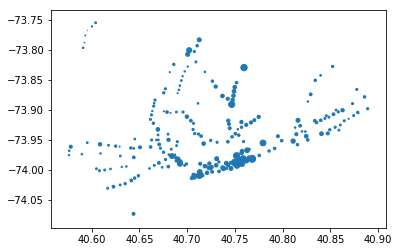

In [263]:
plt.scatter(data_by_location.latitude, data_by_location.longitude,
           s=scales_entries);

## Three-Dimensional Data
Now that you've worked with one-dimensional and two-dimensional data, you might be wondering how to work with three or more dimensions.

### 3D data in NumPy
NumPy arrays can have arbitrarily many dimensions. Just like you can create a 1D array from a list, and a 2D array from a list of lists, you can create a 3D array from a list of lists of lists, and so on. For example, the following code would create a 3D array:

`a = np.array([
    [['A1a', 'A1b', 'A1c'], ['A2a', 'A2b', 'A2c']],
    [['B1a', 'B1b', 'B1c'], ['B2a', 'B2b', 'B2c']]
])`

### 3D data in Pandas
Pandas has a data structure called a Panel, which is similar to a DataFrame or a Series, but for 3D data. If you would like, you can learn more about Panels [here](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#panel).